# 1. Selesaikanlah tabel data di bawah ini dengan metode klasifikasi menggunakan Algoritma Pohon Keputusan (Decision Tree) / Algoritma C4.5. Tentukan Root Nodenya, Child Nodenya, dst, dengan menggunakan rumus Information Gain, Gain dan Entropy.


## Import Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## LANGKAH 1: BACA DATA

In [27]:
print("LANGKAH 1: MEMBACA DATA")
print("-" * 40)
df = pd.read_csv('dataset/credit_data.csv')
print(" Data berhasil dibaca dari CSV")
print(f" Jumlah data: {len(df)} baris, {len(df.columns)} kolom")
print("\nPreview data:")
print(df.head())
print("\nInfo dataset:")
print(df.info())

LANGKAH 1: MEMBACA DATA
----------------------------------------
 Data berhasil dibaca dari CSV
 Jumlah data: 30 baris, 6 kolom

Preview data:
   NO  AGE   INCOME STUDENT CREDIT_RATING  CLASS
0   1   18  8000000   Tidak          Baik  Tidak
1   2   19  9000000   Tidak   Sangat Baik  Tidak
2   3   35  9500000   Tidak          Baik     Ya
3   4   52  6000000   Tidak          Baik     Ya
4   5   56  3500000      Ya          Baik     Ya

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NO             30 non-null     int64 
 1   AGE            30 non-null     int64 
 2   INCOME         30 non-null     int64 
 3   STUDENT        30 non-null     object
 4   CREDIT_RATING  30 non-null     object
 5   CLASS          30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB
None


## LANGKAH 2: EKSPLORASI DATA

In [28]:
print("\n\nLANGKAH 2: EKSPLORASI DATA")
print("-" * 40)
print(f"\nDistribusi Class:")
class_dist = df['CLASS'].value_counts()
print(f"\nDistribusi Class:")
print(f"- Ya: {class_dist['Ya']} ({class_dist['Ya']/len(df)*100:.1f}%)")
print(f"- Tidak: {class_dist['Tidak']} ({class_dist['Tidak']/len(df)*100:.1f}%)")




LANGKAH 2: EKSPLORASI DATA
----------------------------------------

Distribusi Class:

Distribusi Class:
- Ya: 17 (56.7%)
- Tidak: 13 (43.3%)


## LANGKAH 3: PREPROCESSING

In [29]:
print("\n\nLANGKAH 3: PREPROCESSING DATA")
print("-" * 40)

# Label Encoding untuk mengubah data kategorikal menjadi numerik
encoders = {}
encoded_df = df.copy()

feature_cols = ['STUDENT', 'CREDIT_RATING']
#feature_cols = ['AGE', 'INCOME', 'STUDENT', 'CREDIT_RATING']
target_col = 'CLASS'

print("Mapping encoding untuk setiap fitur:")
for col in feature_cols + [target_col]:
    le = LabelEncoder()
    encoded_df[col + '_encoded'] = le.fit_transform(df[col])
    encoders[col] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")



LANGKAH 3: PREPROCESSING DATA
----------------------------------------
Mapping encoding untuk setiap fitur:
STUDENT: {'Tidak': np.int64(0), 'Ya': np.int64(1)}
CREDIT_RATING: {'Baik': np.int64(0), 'Sangat Baik': np.int64(1)}
CLASS: {'Tidak': np.int64(0), 'Ya': np.int64(1)}


In [30]:
encoded_df

,NO,AGE,INCOME,STUDENT,CREDIT_RATING,CLASS,STUDENT_encoded,CREDIT_RATING_encoded,CLASS_encoded
0,1,18,8000000,Tidak,Baik,Tidak,0,0,0
1,2,19,9000000,Tidak,Sangat Baik,Tidak,0,1,0
2,3,35,9500000,Tidak,Baik,Ya,0,0,1
3,4,52,6000000,Tidak,Baik,Ya,0,0,1
4,5,56,3500000,Ya,Baik,Ya,1,0,1
5,6,60,3000000,Ya,Sangat Baik,Tidak,1,1,0
6,7,40,3200000,Ya,Sangat Baik,Ya,1,1,1
7,8,21,5500000,Tidak,Baik,Tidak,0,0,0
8,9,23,2500000,Ya,Baik,Ya,1,0,1
9,10,58,5000000,Ya,Baik,Ya,1,0,1


##  LANGKAH 4: PERSIAPAN FEATURES DAN TARGET

In [31]:
print("\n\nLANGKAH 4: PERSIAPAN FEATURES DAN TARGET")
print("-" * 40)

# X = encoded_df[['AGE', 'INCOME','AGE_encoded', 'INCOME_encoded', 'STUDENT_encoded', 'CREDIT_RATING_encoded']]
X = encoded_df[['AGE', 'INCOME','STUDENT_encoded', 'CREDIT_RATING_encoded']]
y = encoded_df['CLASS_encoded']

print("Features (X):")
print(X)
print(f"\nTarget (y): {y.values}")



LANGKAH 4: PERSIAPAN FEATURES DAN TARGET
----------------------------------------
Features (X):
    AGE   INCOME  STUDENT_encoded  CREDIT_RATING_encoded
0    18  8000000                0                      0
1    19  9000000                0                      1
2    35  9500000                0                      0
3    52  6000000                0                      0
4    56  3500000                1                      0
5    60  3000000                1                      1
6    40  3200000                1                      1
7    21  5500000                0                      0
8    23  2500000                1                      0
9    58  5000000                1                      0
10   22  5200000                1                      1
11   39  5800000                0                      1
12   37  9500000                1                      0
13   59  6000000                0                      1
14   25  7200000                1              

## LANGKAH 5: MEMBUAT DECISION TREE

In [32]:
print("\n\nLANGKAH 5: MEMBUAT DECISION TREE (C4.5)")
print("-" * 40)

# Inisialisasi Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)


print("Parameter Decision Tree:")
print(f"- Criterion: {dt_classifier.criterion} (Information Gain)")
print(f"- Max Depth: {dt_classifier.max_depth}")
print(f"- Min Samples Split: {dt_classifier.min_samples_split}")
print(f"- Min Samples Leaf: {dt_classifier.min_samples_leaf}")

# Training model
dt_classifier.fit(X, y)
print(" Model Decision Tree berhasil dilatih!")



LANGKAH 5: MEMBUAT DECISION TREE (C4.5)
----------------------------------------
Parameter Decision Tree:
- Criterion: entropy (Information Gain)
- Max Depth: None
- Min Samples Split: 2
- Min Samples Leaf: 1
 Model Decision Tree berhasil dilatih!


## LANGKAH 6: EVALUASI MODEL

In [21]:
print("\n\nLANGKAH 6: EVALUASI MODEL")
print("-" * 40)

# Prediksi
y_pred = dt_classifier.predict(X)
accuracy = dt_classifier.score(X, y)

print(f"Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
target_names = encoders['CLASS'].classes_
print(classification_report(y, y_pred, target_names=target_names, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred)
print(cm)



LANGKAH 6: EVALUASI MODEL
----------------------------------------
Akurasi: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

       Tidak       1.00      1.00      1.00         5
          Ya       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14


Confusion Matrix:
[[5 0]
 [0 9]]


## LANGKAH 7: ATURAN DECISION TREE

In [33]:
print("\n\nLANGKAH 7: ATURAN DECISION TREE")
print("-" * 40)

class_names = encoders['CLASS'].classes_
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)




LANGKAH 7: ATURAN DECISION TREE
----------------------------------------
|--- STUDENT_encoded <= 0.50
|   |--- AGE <= 33.00
|   |   |--- class: 0
|   |--- AGE >  33.00
|   |   |--- INCOME <= 5250000.00
|   |   |   |--- class: 0
|   |   |--- INCOME >  5250000.00
|   |   |   |--- AGE <= 44.50
|   |   |   |   |--- class: 1
|   |   |   |--- AGE >  44.50
|   |   |   |   |--- CREDIT_RATING_encoded <= 0.50
|   |   |   |   |   |--- INCOME <= 7200000.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- INCOME >  7200000.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- CREDIT_RATING_encoded >  0.50
|   |   |   |   |   |--- class: 0
|--- STUDENT_encoded >  0.50
|   |--- AGE <= 59.00
|   |   |--- class: 1
|   |--- AGE >  59.00
|   |   |--- class: 0



## LANGKAH 8: FEATURE IMPORTANCE

In [34]:
print("\n\nLANGKAH 8: FEATURE IMPORTANCE")
print("-" * 40)

importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
for idx, row in feature_importance_df.iterrows():
    print(f"{row['Feature']:15}: {row['Importance']:.4f}")




LANGKAH 8: FEATURE IMPORTANCE
----------------------------------------
Feature Importance:
STUDENT_encoded: 0.4554
AGE            : 0.3586
INCOME         : 0.1440
CREDIT_RATING_encoded: 0.0420


## LANGKAH 9: CONTOH PREDIKSI BARU

In [38]:
print("\n\nLANGKAH 9: CONTOH PREDIKSI DATA BARU")
print("-" * 40)

def predict_credit(age, income, student, credit_rating):
    """Fungsi untuk prediksi kredit dengan input kategorikal"""
    
    # Encode input
    age_encoded = age
    income_encoded = income
    # age_encoded = encoders['AGE'].transform([age])[0]
    # income_encoded = encoders['INCOME'].transform([income])[0]
    student_encoded = encoders['STUDENT'].transform([student])[0]
    credit_encoded = encoders['CREDIT_RATING'].transform([credit_rating])[0]
    
    
    input_df = pd.DataFrame([[age_encoded, income_encoded, student_encoded, credit_encoded]], columns=X.columns)

    # Prediksi
    prediction = dt_classifier.predict(input_df)[0]
    probability = dt_classifier.predict_proba(input_df)[0]
    
    result = encoders['CLASS'].inverse_transform([prediction])[0]
    
    print(f"Input: Age={age}, Income={income}, Student={student}, Credit={credit_rating}")
    print(f"Prediksi: {result}")
    print(f"Probabilitas [Tidak, Ya]: [{probability[0]:.3f}, {probability[1]:.3f}]")
    return result


# Test Data kasus
print("Contoh prediksi:")
predict_credit('59', '8000000', 'Ya', 'Baik')
print()
predict_credit('39', '9500000', 'Tidak', 'Baik')



LANGKAH 9: CONTOH PREDIKSI DATA BARU
----------------------------------------
Contoh prediksi:
Input: Age=59, Income=8000000, Student=Ya, Credit=Baik
Prediksi: Ya
Probabilitas [Tidak, Ya]: [0.000, 1.000]

Input: Age=39, Income=9500000, Student=Tidak, Credit=Baik
Prediksi: Ya
Probabilitas [Tidak, Ya]: [0.000, 1.000]


'Ya'

## LANGKAH 10: VISUALISASI



LANGKAH 10: VISUALISASI
----------------------------------------


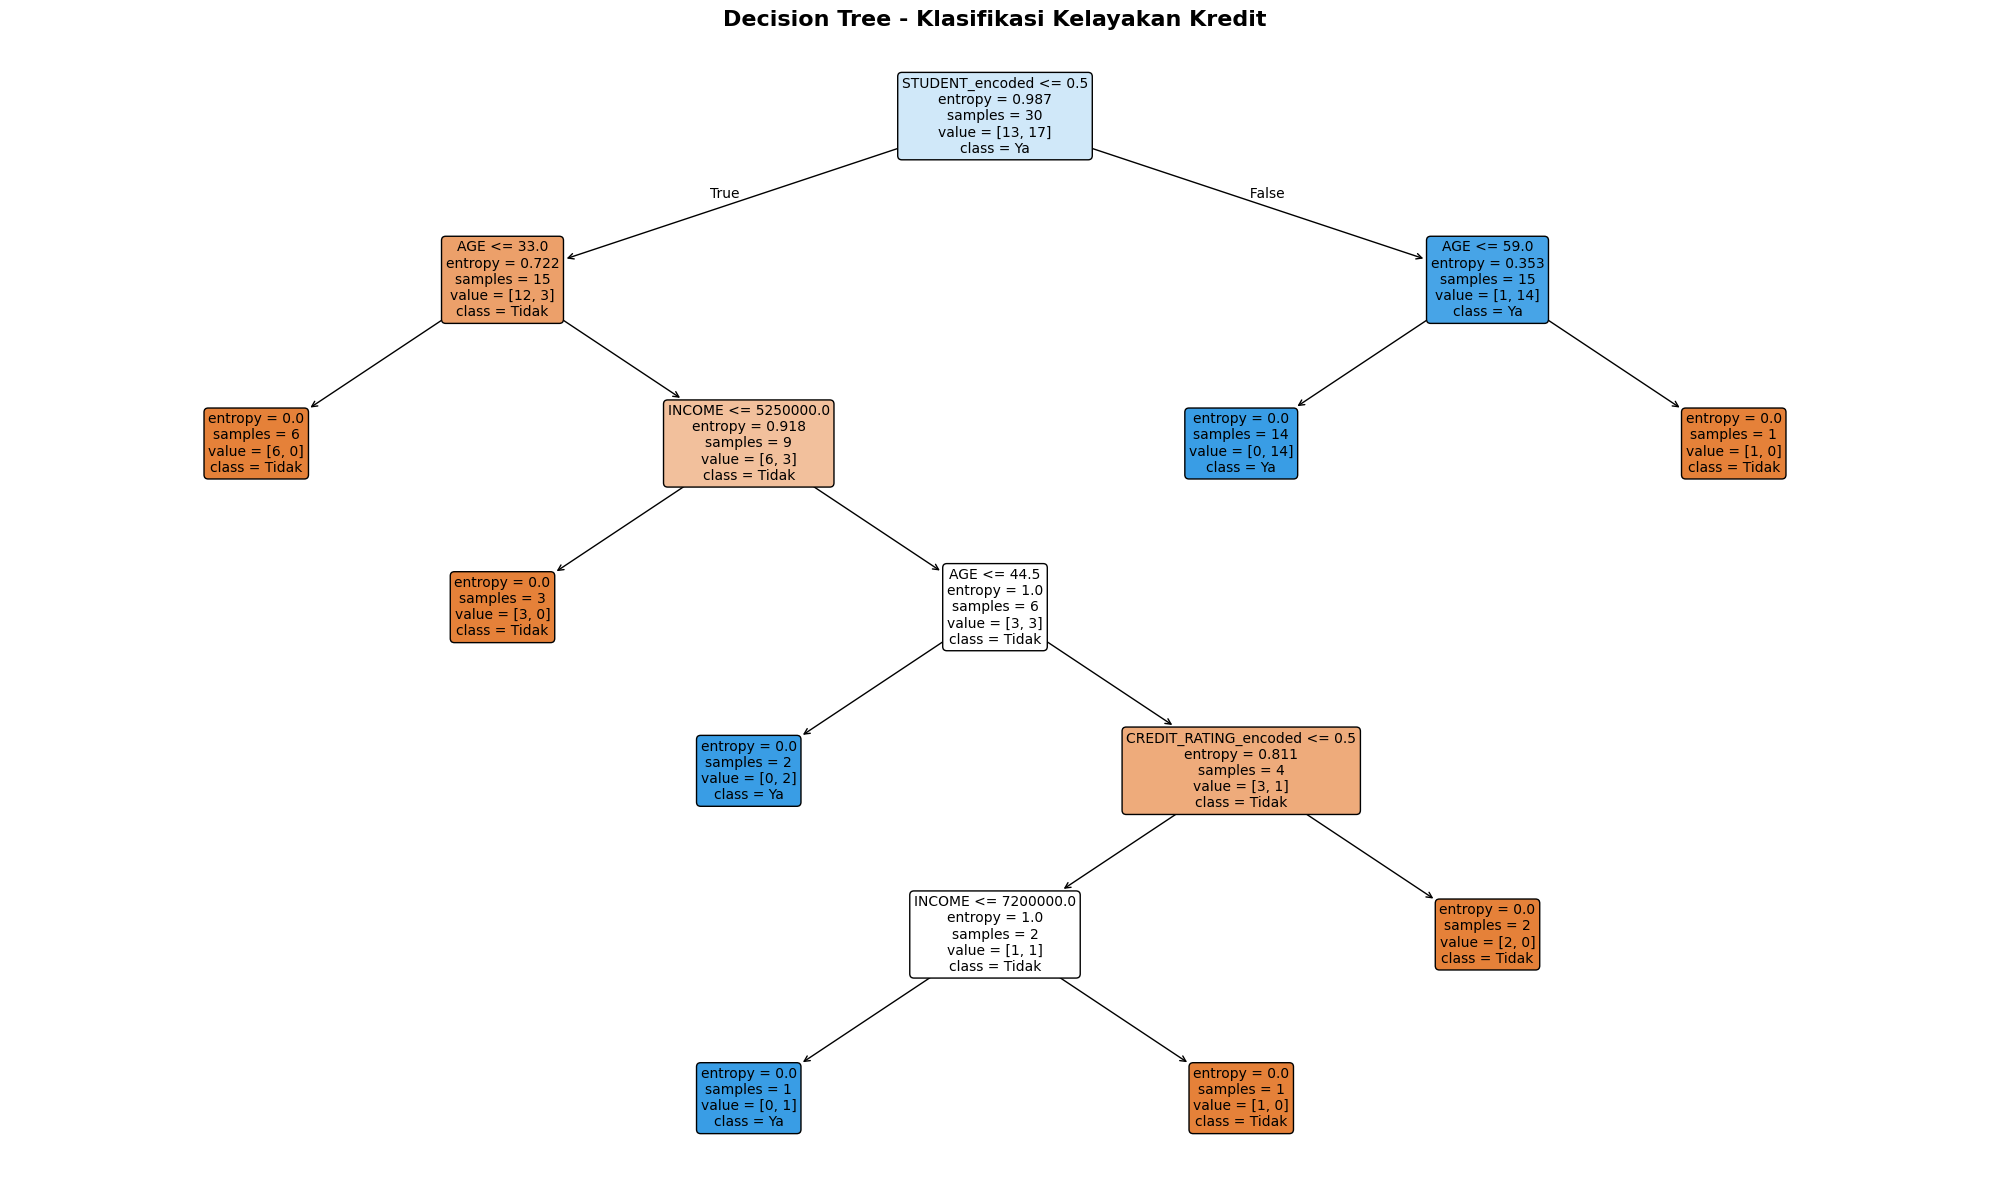

In [39]:
print("\n\nLANGKAH 10: VISUALISASI")
print("-" * 40)

# Plot 1: Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=X.columns,
          class_names=class_names,
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree - Klasifikasi Kelayakan Kredit", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

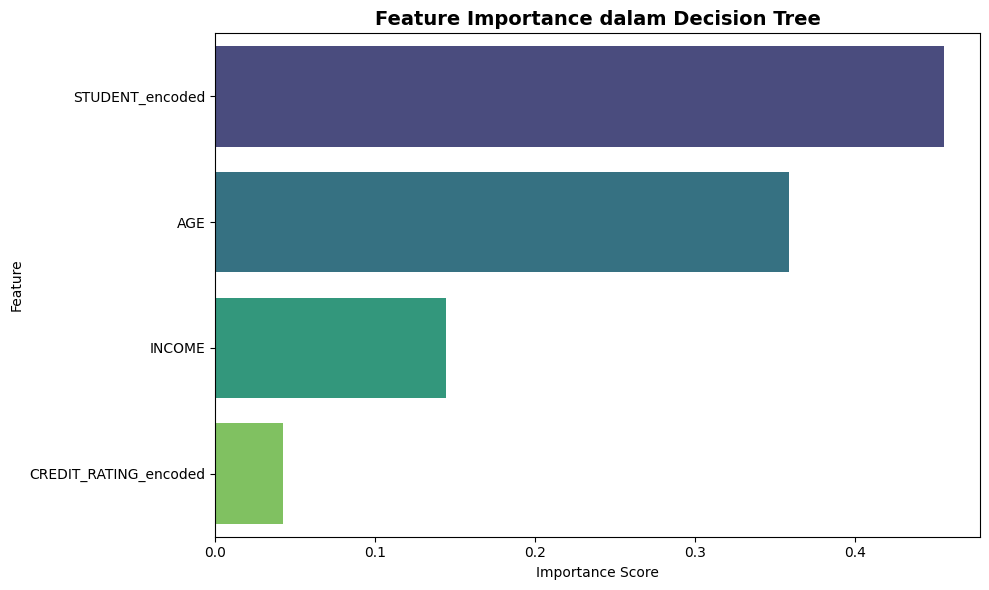

In [40]:
# Plot 2: Feature Importance
plt.figure(figsize=(10, 6))


sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',             
    palette='viridis',
    dodge=False,             
    legend=False              
)

plt.title('Feature Importance dalam Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


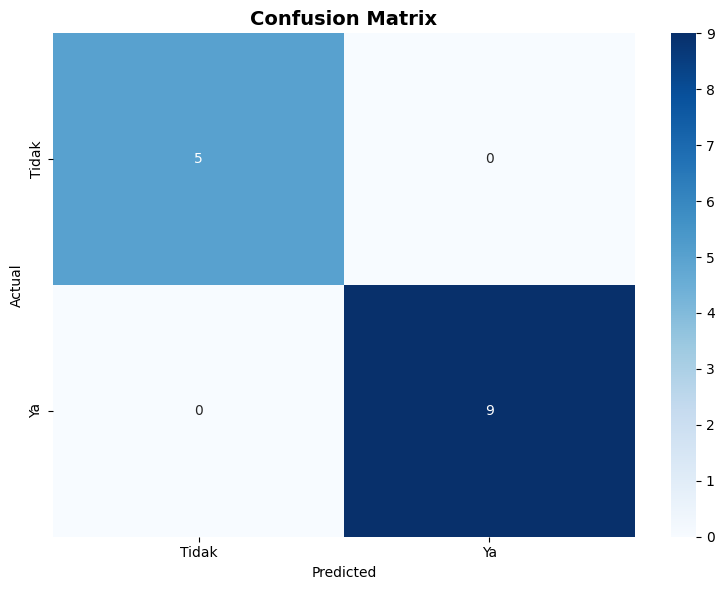

In [41]:
# Plot 3: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [43]:
print("\n" + "="*70)
print(" KESIMPULAN:")
print("="*70)
print(f"1. Decision Tree berhasil dibuat dengan akurasi {accuracy*100:.2f}%")
print(f"2. Feature paling penting: {feature_importance_df.iloc[0]['Feature']} ({feature_importance_df.iloc[0]['Importance']:.4f})")
print(f"3. Model menggunakan criterion 'entropy' (Information Gain)")
print(f"4. Total {len(df)} data berhasil diklasifikasi")
print(f"5. Distribusi prediksi: {dict(pd.Series(y_pred).map({0: 'Tidak', 1: 'Ya'}).value_counts())}")
print("="*70)


 KESIMPULAN:
1. Decision Tree berhasil dibuat dengan akurasi 100.00%
2. Feature paling penting: STUDENT_encoded (0.4554)
3. Model menggunakan criterion 'entropy' (Information Gain)
4. Total 30 data berhasil diklasifikasi
5. Distribusi prediksi: {'Ya': np.int64(9), 'Tidak': np.int64(5)}
